In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Molecular subgraph

We use an example of a molecular subgraph, which exhibits a nice circular pattern.

In [62]:
from hypotest.ontologies import molecular_subgraph

In [63]:
import networkx as nx
from grontocrawler.graph import produce_graph

In [64]:
sub_g = molecular_subgraph.g
molecular_subgraph = produce_graph.produce_graph(sub_g, options=['existential-arcs'])

### Source and target

Identify source and target as `TNF alpha overproduction` to `Synovial inlammation`

In [65]:
uri = "http://plumdeq.xyz/ontologies/hypothesis/"
source_id = ''.join([uri, 'TNF_alpha_overproduction'])
target_id = ''.join([uri, 'Synovial_inflammation'])

In [66]:
print(molecular_subgraph.node[source_id])
print(molecular_subgraph.node[target_id])

{'node_uri': 'http://plumdeq.xyz/ontologies/hypothesis/TNF_alpha_overproduction', 'label': u'TNF alpha overproduction'}
{'node_uri': 'http://plumdeq.xyz/ontologies/hypothesis/Synovial_inflammation', 'label': u'Synovial inflammation'}


In [67]:
from hypotest.graph_generation import hypoth_conf

In [68]:
conf = hypoth_conf.Hypoth_Conf(source_id, target_id, [])

## Draw the subgraph

In [69]:
import os
path_to_figures = './images/molecular-subgraph/'
from hypotest.io import write_dot
from IPython.display import Image

In [70]:
small_dot = os.path.join(path_to_figures, 'small.dot')
small_png = os.path.join(path_to_figures, 'small.png')

with open(small_dot, 'w') as f:
    write_dot.hypothgraph_to_dot(molecular_subgraph, conf, stream=f)

In [71]:
!dot -Tpng -o $small_png $small_dot

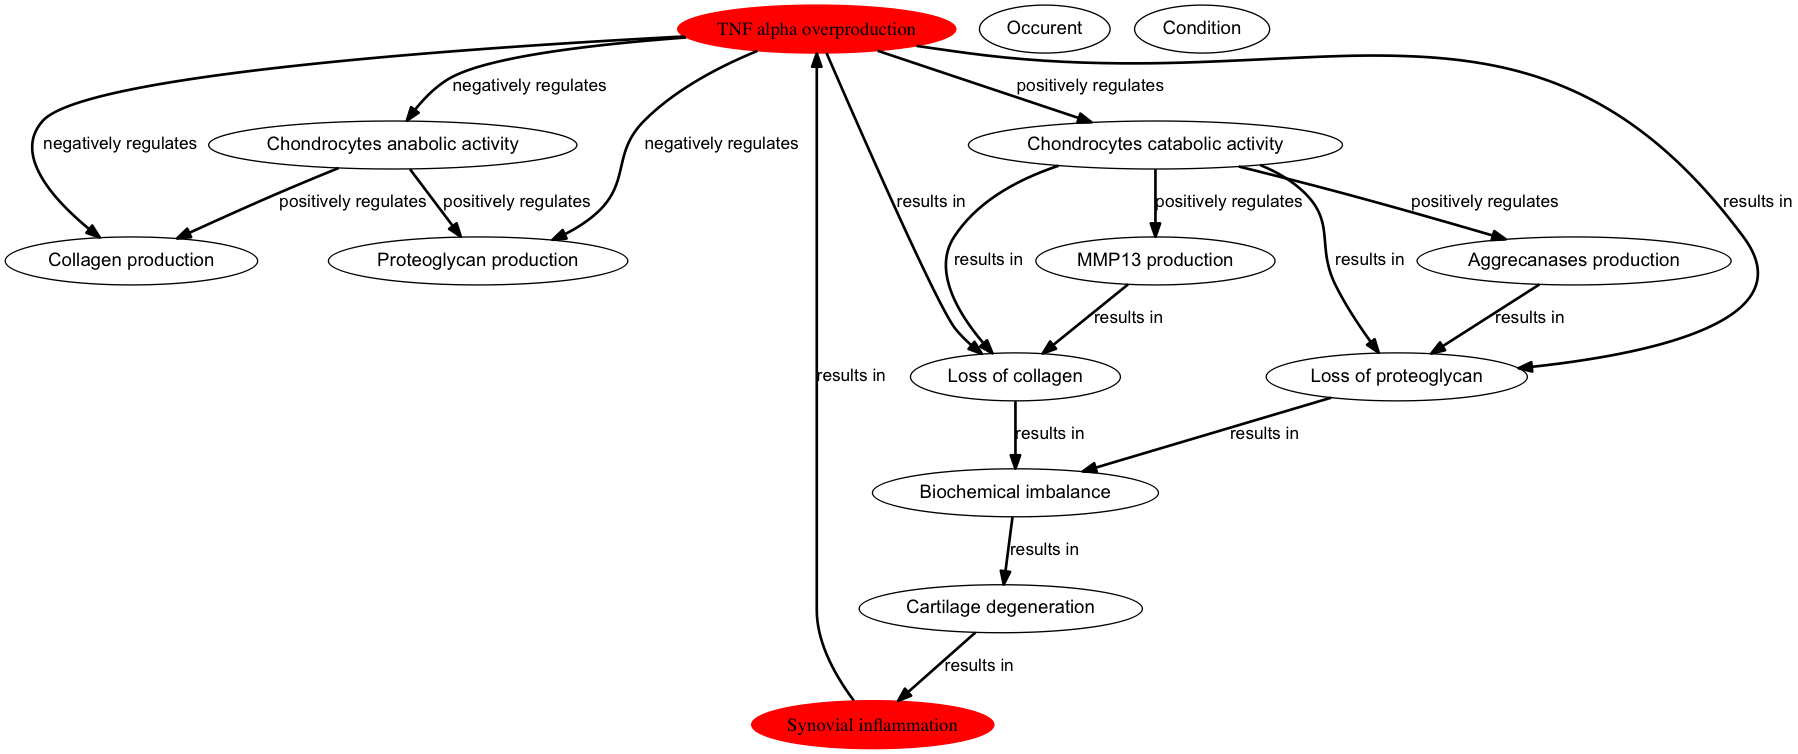

In [72]:
Image(small_png)

## Normalize and draw

In [73]:
from hypotest.graph_mutation import normalize_hypothgraph

In [74]:
normalized_subgraph, normalized_nodes = normalize_hypothgraph.normalize_hypothgraph(molecular_subgraph)

### Update hypothesis configuration

In [75]:
normalized_source_id = ''.join([uri, 'Positive_regulation_of_TNF_alpha_overproduction'])

In [76]:
normalized_conf = hypoth_conf.Hypoth_Conf(normalized_source_id, target_id, [])

In [77]:
normalized_small_dot = os.path.join(path_to_figures, 'normalized_small.dot')
normalized_small_png = os.path.join(path_to_figures, 'normalized_small.png')

with open(normalized_small_dot, 'w') as f:
    write_dot.hypothgraph_to_dot(normalized_subgraph, normalized_conf, stream=f)

In [78]:
!dot -Tpng -o $normalized_small_png $normalized_small_dot

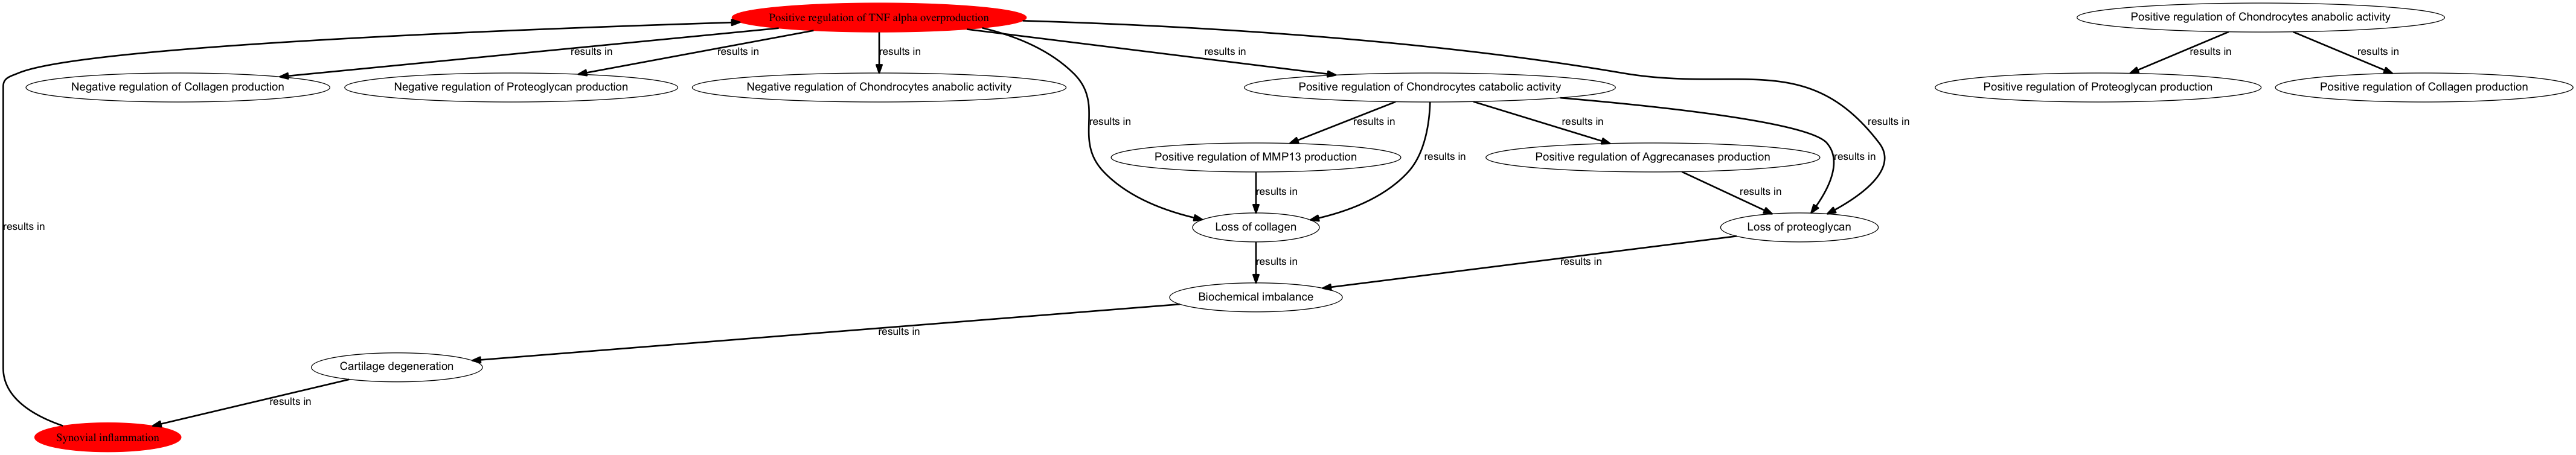

In [79]:
Image(normalized_small_png)

## Running confidences

* How many causal chains have led to these conclusion that TNF alpha caused Synovial inflammation. 
* Confidence of each of the causal chains is the number of evidenced nodes in that chain
* Confidence in a hypothesis is the sum of confidences of all causal chains.

### Number of causal chains

In [81]:
len(list(nx.all_simple_paths(normalized_subgraph, normalized_source_id, target_id)))

6

### Importance in the confidence for different nodes

In [86]:
from hypotest.confidence import compute_confidence
Hypoth_Conf = hypoth_conf.Hypoth_Conf

In [102]:
important_node = ''.join([uri, 'Biochemical_imbalance'])
unimportant_node = ''.join([uri, 'Positive_regulation_of_Aggrecanases_production'])

In [104]:
compute_confidence.confidence(normalized_subgraph, 
                              Hypoth_Conf(normalized_source_id, target_id, 
                                          [important_node]))

6.0

In [103]:
compute_confidence.confidence(normalized_subgraph, 
                              Hypoth_Conf(normalized_source_id, target_id, 
                                          [unimportant_node]))

1.0

In [106]:
def importance_of_nodes(hypothgraph, source, target):
    confidences = {}
    for node in hypothgraph.nodes_iter(data=True):
        conf = Hypoth_Conf(source, target, [node])
        confidence = compute_confidence.confidence(hypothgraph, conf)
        confidences[node] = confidence
        
    return confidences

In [108]:
importance_of_nodes(normalized_subgraph, normalized_source_id, target_id)

{'http://plumdeq.xyz/ontologies/hypothesis/Biochemical_imbalance': 6.0,
 'http://plumdeq.xyz/ontologies/hypothesis/Cartilage_degeneration': 6.0,
 'http://plumdeq.xyz/ontologies/hypothesis/Loss_of_collagen': 3.0,
 'http://plumdeq.xyz/ontologies/hypothesis/Loss_of_proteoglycan': 3.0,
 u'http://plumdeq.xyz/ontologies/hypothesis/Negative_regulation_of_Chondrocytes_anabolic_activity': 0.0,
 u'http://plumdeq.xyz/ontologies/hypothesis/Negative_regulation_of_Collagen_production': 0.0,
 u'http://plumdeq.xyz/ontologies/hypothesis/Negative_regulation_of_Proteoglycan_production': 0.0,
 u'http://plumdeq.xyz/ontologies/hypothesis/Positive_regulation_of_Aggrecanases_production': 1.0,
 u'http://plumdeq.xyz/ontologies/hypothesis/Positive_regulation_of_Chondrocytes_anabolic_activity': 0.0,
 u'http://plumdeq.xyz/ontologies/hypothesis/Positive_regulation_of_Chondrocytes_catabolic_activity': 4.0,
 u'http://plumdeq.xyz/ontologies/hypothesis/Positive_regulation_of_Collagen_production': 0.0,
 u'http://plumdeq